# Discovering The Most Important Attributes of Tracks on Spotify

## Task Overview
In this notebook we will be analyzing a Spotify dataset in order to discover the most important attributes of a track.  Along the way we will take a special look at the metrics of the most popular tracks within each genre.

We will start by cleaning the data and preparing it for analysis.

## Data Origin
This dataset is from [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download), which includes a csv file containing the following metrics:
- `track_id`: The Spotify ID for the track
- `artists`: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- `album_name`: The album name in which the track appears
- `track_name`: Name of the track
- `popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- `duration_ms`: The track length in milliseconds
- `explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- `loudness`: The overall loudness of a track in decibels (dB)
- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- `track_genre`: The genre in which the track belongs
### Run the cell below to load the data.

In [3]:
### Run me!
import pandas as pd
import numpy as np
from pandas.testing import assert_frame_equal
import numpy as np
import matplotlib.pyplot as plt


spotify_df = pd.read_csv('dataset.csv')
original_df = spotify_df.copy()

# Clean The Data

**Input:** `spotify_df`: A Pandas DataFrame, as described above

**Return:** `cleaned_df`: A Pandas DataFrame that has been cleansed for processing

**Requirements:** 

0. Do not modify the original DataFrame
1. Remove the unnamed index column.
2. Rename the `valence` column 'positivity.'
3. Rename the `loudness` column 'loudness_DBFS'

In [6]:
def clean_data(spotify_df: pd.DataFrame):
    df = spotify_df.drop(['Unnamed: 0'], axis=1)
    df = df.rename(columns={'valence': 'positivity', 'loudness': 'loudness_DBFS'})
    return df

# demo function call
results = clean_data(spotify_df)
display(results.head())
assert_frame_equal(spotify_df, original_df)
clean_df = results.copy()
print("Passed.")

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness_DBFS,mode,speechiness,acousticness,instrumentalness,liveness,positivity,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Passed.


# A Quick Helper Function

Before starting our analysis, let's build a helper function.

**Input:** `clean_df`: A Pandas DataFrame, as described above

`n`: An integer

**Return:** `top_n_tracks_by_genre`: A Pandas DataFrame containing the n most popular tracks in each genre

**Requirements:** 

1. Reset the index

In [9]:
def top_n_tracks_by_genre(clean_df: pd.DataFrame, n: int):
    out = (clean_df
           .groupby(by='track_genre')
           .apply(lambda row: row.nlargest(n, 'popularity'))
           .reset_index(drop=True)
          )
    return out

# demo function call
top_10_tracks_by_genre_df = top_n_tracks_by_genre(clean_df,10)
display(top_10_tracks_by_genre_df.head(15))

/var/folders/kx/99614hls65df7b2lvnhcv1dr0000gn/T/ipykernel_89232/2767767776.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row.nlargest(n, 'popularity'))


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness_DBFS,mode,speechiness,acousticness,instrumentalness,liveness,positivity,tempo,time_signature,track_genre
0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
1,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
2,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
3,08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,Pano,75,254400,False,0.375,0.457,3,-7.018,1,0.0315,0.8680,0.014500,0.1910,0.4150,174.839,3,acoustic
4,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
5,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
6,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,False,0.627,0.363,8,-8.127,1,0.0291,0.2790,0.000000,0.0928,0.3010,99.905,4,acoustic
7,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
8,5p9XWUdvbUzmPCukOmwoU3,KT Tunstall,Eye To The Telescope,Suddenly I See,73,201706,False,0.587,0.767,0,-5.713,1,0.0449,0.2250,0.000000,0.1120,0.6640,100.380,4,acoustic
9,4E6cwWJWZw2zWf7VFbH7wf,Sara Bareilles,Little Voice,Love Song,73,258826,False,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.5730,123.055,4,acoustic


# Initial Analysis

Now let's perform an initial analysis by taking averages of the most popular songs in each genre. 

**Input:** `clean_df`: A Pandas DataFrame, as described above

**Return:** `top_stats_df`: A Pandas DataFrame containing the required statistics for each genre

**Requirements:** 

Do not modify the original DataFrame.

The return DataFrame should include the following mean values for the top 10 songs in each genre, sorted by `avg_popularity` descending:

- `avg_popularity`
- `avg_duration_mins`: convert to minutes
- `avg_danceability`
- `avg_energy`
- `avg_loudness_DBFS`
- `avg_speechiness`
- `avg_acousticness`
- `avg_instrumentalness`
- `avg_liveness`
- `avg_positivity`

`track_genre` should also be renamed `genre` for this analysis



In [12]:
def top_stats(clean_df: pd.DataFrame):
    t_df = top_n_tracks_by_genre(clean_df, 10)
    out = t_df.groupby(by='track_genre').mean(numeric_only=True)
    out['avg_duration_mins'] = out['duration_ms'].apply(lambda ms: ms / 60000)
    out = out.drop(columns=['duration_ms'])
    out = out.reset_index(drop=False)
    out = out.rename(columns={'popularity': 'avg_popularity',
                              'danceability': 'avg_danceability',
                              'energy': 'avg_energy',
                              'loudness_DBFS': 'avg_loudness_DBFS',
                              'speechiness': 'avg_speechiness',
                              'acousticness': 'avg_acousticness',
                              'instrumentalness': 'avg_instrumentalness',
                              'liveness': 'avg_liveness',
                              'positivity': 'avg_positivity',
                              'track_genre': 'genre',
                              'key': 'avg_key',
                              'tempo': 'avg_tempo',
                              'time_signature': 'avg_time_signature',
                              'explicit': 'avg_explicit',
                              'mode': 'avg_mode'})
    out = out.sort_values(by='avg_popularity', ascending=[False])
    out = out.reset_index(drop=True)
    return out

# demo function call
top_stats_df = top_stats(clean_df)
display(top_stats_df)

/var/folders/kx/99614hls65df7b2lvnhcv1dr0000gn/T/ipykernel_89232/2767767776.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row.nlargest(n, 'popularity'))


,genre,avg_popularity,avg_explicit,avg_danceability,avg_energy,avg_key,avg_loudness_DBFS,avg_mode,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_positivity,avg_tempo,avg_time_signature,avg_duration_mins
0,pop,94.9,0.3,0.64110,0.671400,5.9,-5.8546,0.6,0.04638,0.314143,0.002017,0.16481,0.46570,131.4870,3.9,3.241002
1,latin,94.3,0.4,0.78570,0.670700,6.0,-5.4714,0.2,0.10802,0.188850,0.000035,0.21334,0.41440,106.1383,3.9,3.416442
2,reggae,94.2,0.4,0.78930,0.639500,5.0,-6.0063,0.3,0.10891,0.233450,0.000857,0.21404,0.40940,107.0369,3.9,3.441285
3,reggaeton,94.2,0.4,0.78930,0.639500,5.0,-6.0063,0.3,0.10891,0.233450,0.000857,0.21404,0.40940,107.0369,3.9,3.441285
4,latino,94.0,0.4,0.78100,0.700800,5.9,-5.2592,0.2,0.11221,0.183300,0.000089,0.22324,0.41870,103.6380,3.9,3.507290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,detroit-techno,49.4,0.0,0.71910,0.760600,6.5,-9.1769,0.4,0.07640,0.086624,0.464316,0.13769,0.69270,131.4754,4.0,5.882815
110,grindcore,43.2,0.2,0.28320,0.966700,5.0,-5.6232,0.7,0.14032,0.000088,0.451485,0.18394,0.21645,121.0942,3.9,3.463212
111,tango,38.0,0.0,0.46330,0.361500,5.2,-12.8913,0.5,0.09499,0.776700,0.081699,0.45434,0.53920,114.7401,3.9,3.190857
112,romance,32.6,0.0,0.46720,0.289810,3.6,-13.9015,0.3,0.04521,0.682500,0.013767,0.14431,0.39450,118.9657,4.0,3.898642


# Visualization of Preliminary Results

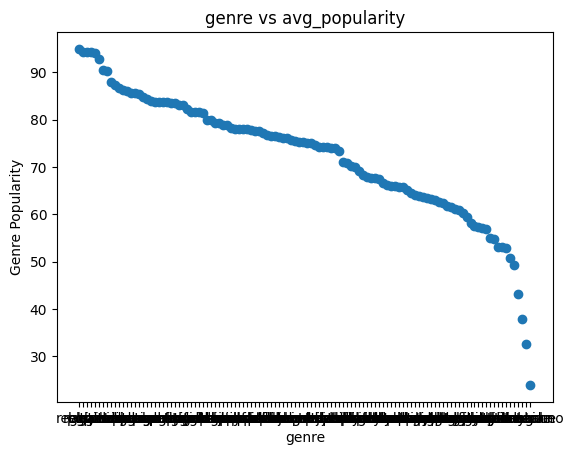

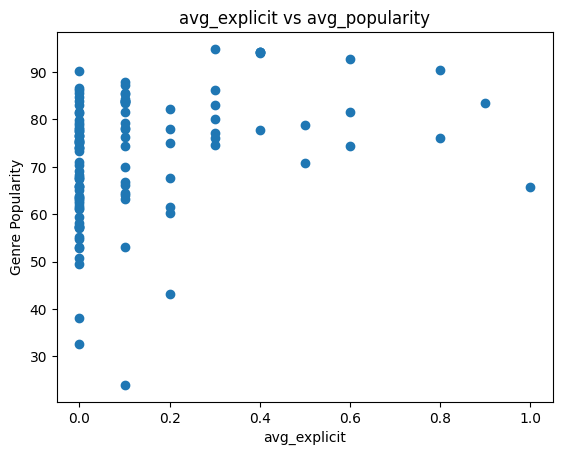

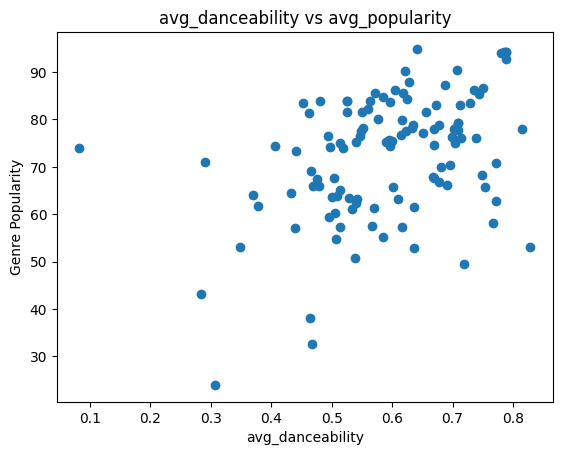

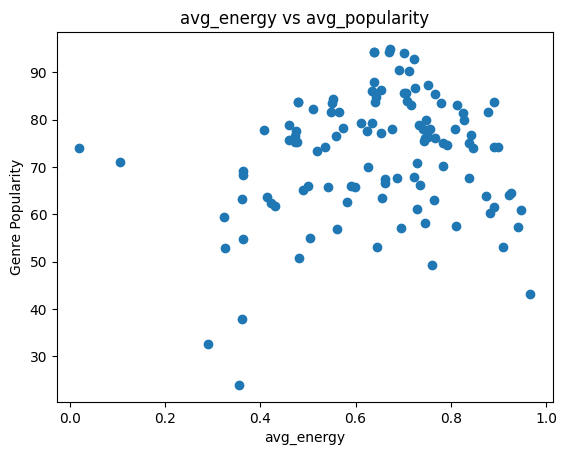

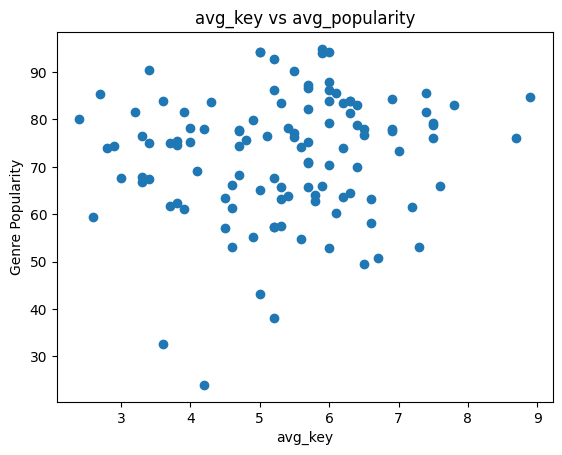

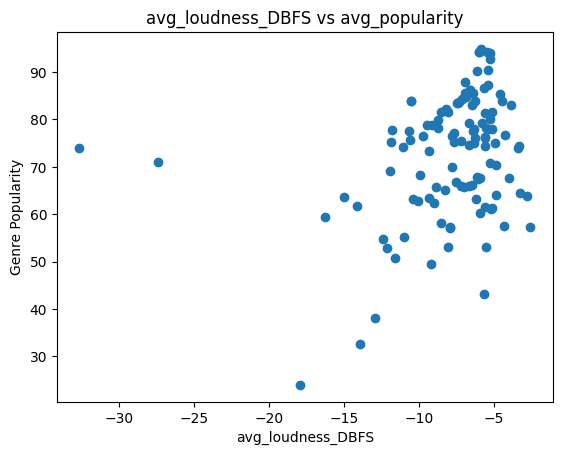

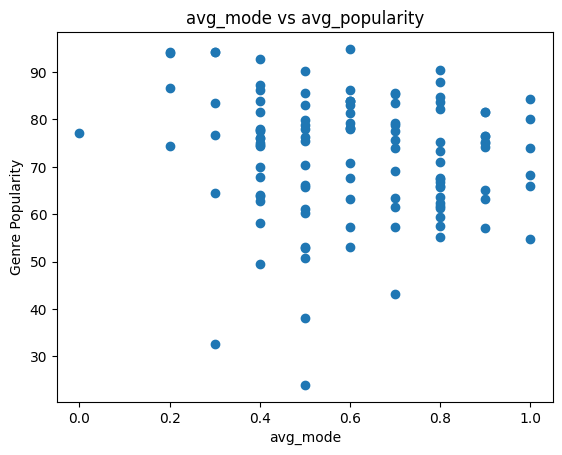

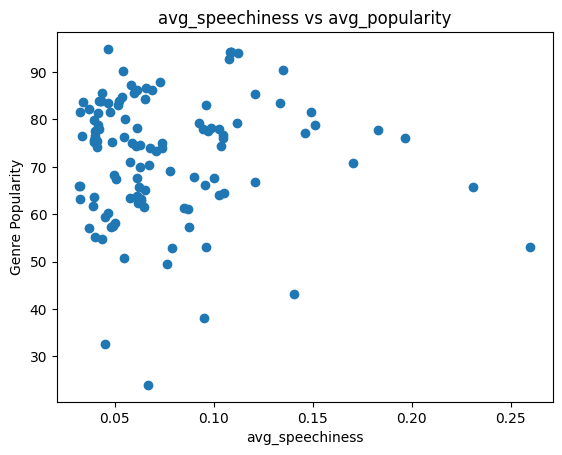

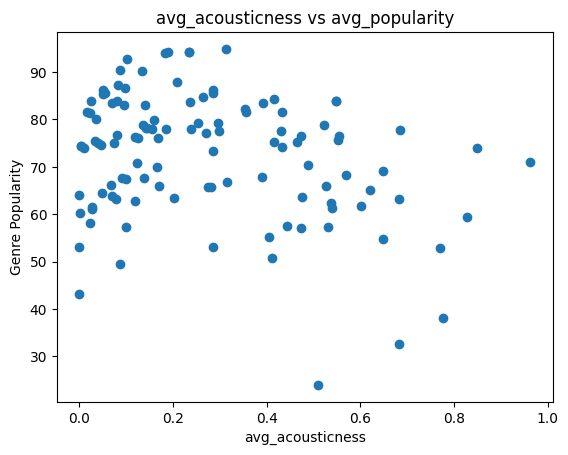

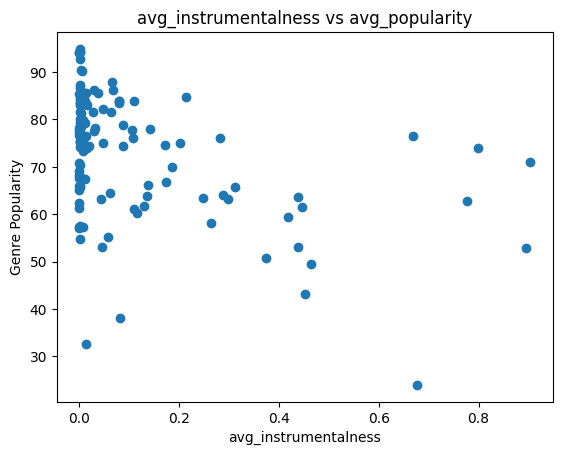

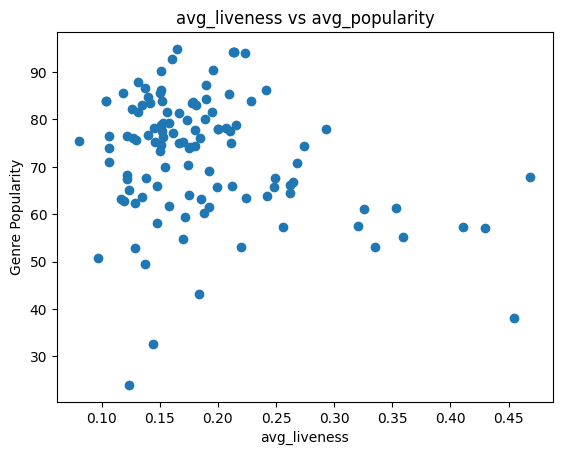

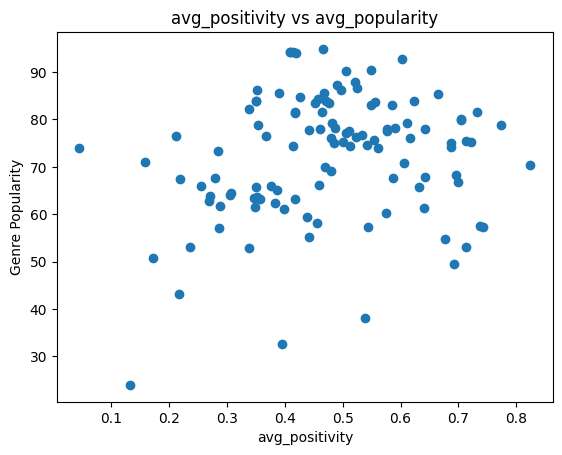

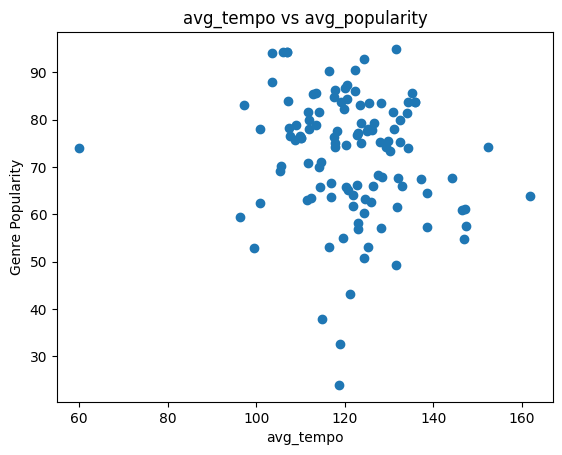

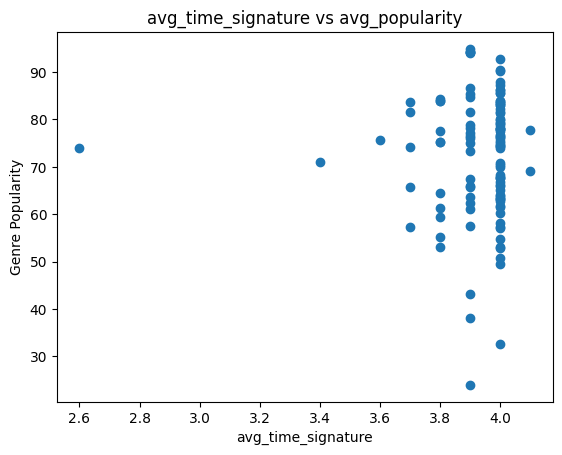

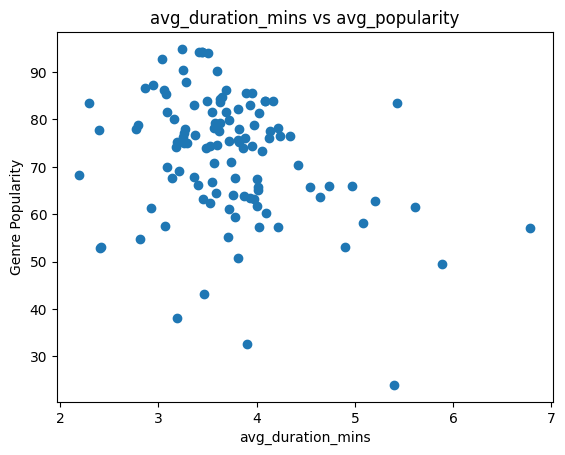

In [22]:
vis = top_stats_df.drop(columns='avg_popularity')
for col, data in vis.items():
    plt.scatter(top_stats_df[col], top_stats_df['avg_popularity'])
    plt.title(f'{col} vs avg_popularity')
    plt.xlabel(col)
    plt.ylabel('Genre Popularity')
    plt.show()

# Which Genres Reach The Highest?

Genre seems to be an indicator of popularity.  Let's find out which genres had top tracks with average scores above the 80 in popularity.

**Input:** 

`top_stats_df`: A Pandas DataFrame, as described above

`threshold`: An integer representing the minimum average popularity value allowed

**Return:** `popular_genres_df`: A Pandas DataFrame containing genres with `avg_popularity` values above the `threshold`

**Requirements:** 


In [31]:
def popular_genres(top_stats_df: pd.DataFrame, threshold: int):
    return top_stats_df[top_stats_df['avg_popularity'] > threshold][['genre', 'avg_popularity']]


# demo function call
popular_genres_df = popular_genres(top_stats_df, 80)
display(popular_genres_df)

,genre,avg_popularity
0,pop,94.9
1,latin,94.3
2,reggae,94.2
3,reggaeton,94.2
4,latino,94.0
...,...,...
27,british,82.2
28,r-n-b,81.6
29,folk,81.6
30,punk,81.5


# Hypothesis

At this point we have dug deep enough into the data to hypothesize about which attributes may be significant.  It looks to me that overall loudness plays a substantial role in the success of a track, as well as the right balance of energy, positivity, avoiding instrumentalness, and hitting the low 3-minute duration.  Genre also looks interesting, but it is qualitative. Let's perform a **principle component analysis** to see if my intuition is correct.

### Start by collecting only the quantitative data from the dataset.

**Input:** `clean_df`: A Pandas DataFrame, as described above

**Return:** `quant_df`: A Pandas DataFrame containing only the quantitative data of `clean_df`

**Requirements:** 

Drop any columns that are strings.  Convert `explicit` to 1 or 0 instead of `True` or `False`, where 1 means `True`.

In [39]:
def quant_data(clean_df: pd.DataFrame):
    strs = clean_df.select_dtypes(include='object')
    out = clean_df.drop(strs, axis=1)
    out['explicit'] = out.apply(lambda x: 1 if x['explicit'] == True else 0, axis=1)
    return out

# demo function call
quant_df = quant_data(clean_df)
display(quant_df)

,popularity,duration_ms,explicit,danceability,energy,key,loudness_DBFS,mode,speechiness,acousticness,instrumentalness,liveness,positivity,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


# Centering The Data

The first step of PCA is to center the data about the mean.  We will do this for all columns in `quant_df`

**Input:** `quant_df`: A Pandas DataFrame of quantitative data only

**Return:** `centered_clean_df`: A Pandas DataFrame containing the data of `quant_df` cenetered about their mean, i.e., $\frac{1}{m} \sum_{i=0}^{m-1} \hat{x}_i = 0$. 

**Requirements:** 

1. Do not modify the original DataFrame.
2. All data should be centered about their mean column-wise. Each observation is represented by a $d$-dimensional real-valued vector corresponding to $d$ measured predictors. We have already stacked them into a data matrix, denoted $X \equiv \left(\begin{array}{c} \hat{x}_0^T \\ \vdots \\ \hat{x}_{m-1}^T \end{array}\right)$, and wish to ensure that $\frac{1}{m} \sum_{i=0}^{m-1} \hat{x}_i = 0$. 

In [46]:
def centered_data(quant_df: pd.DataFrame):
    means = quant_df.apply(np.mean)
    centered = (quant_df - means)
    return centered

# demo function call
centered_clean_df = centered_data(quant_df)
display(centered_clean_df)

,popularity,duration_ms,explicit,danceability,energy,key,loudness_DBFS,mode,speechiness,acousticness,instrumentalness,liveness,positivity,tempo,time_signature
0,39.761465,2636.846886,-0.0855,0.1092,-0.180383,-4.30914,1.51296,-0.637553,0.058348,-0.28271,-0.156049,0.144447,0.240932,-34.230837,0.095965
1,21.761465,-78419.153114,-0.0855,-0.1468,-0.475383,-4.30914,-8.97604,0.362447,-0.008352,0.60909,-0.156044,-0.112553,-0.207068,-44.658837,0.095965
2,23.761465,-17203.153114,-0.0855,-0.1288,-0.282383,-5.30914,-1.47504,0.362447,-0.028952,-0.10491,-0.156050,-0.096553,-0.354068,-45.815837,0.095965
3,37.761465,-26096.153114,-0.0855,-0.3008,-0.581783,-5.30914,-10.25604,0.362447,-0.048352,0.59009,-0.155979,-0.081553,-0.331068,59.592163,-0.904035
4,48.761465,-29176.153114,-0.0855,0.0512,-0.198383,-3.30914,-1.42204,0.362447,-0.032052,0.15409,-0.156050,-0.130653,-0.307068,-2.198837,0.095965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-12.238535,156969.846886,-0.0855,-0.3948,-0.406383,-0.30914,-8.13404,0.362447,-0.042452,0.32509,0.771950,-0.127253,-0.440168,3.847163,1.095965
113996,-11.238535,156970.846886,-0.0855,-0.3928,-0.524383,-5.30914,-10.05904,-0.637553,-0.044552,0.67909,0.819950,-0.108553,-0.439068,-36.908837,0.095965
113997,-11.238535,43436.846886,-0.0855,0.0622,-0.312383,-5.30914,-2.63604,-0.637553,-0.042652,0.55209,-0.156050,-0.129653,0.268932,10.230163,0.095965
113998,7.761465,55863.846886,-0.0855,0.0202,-0.135383,1.69086,-2.63004,0.362447,-0.054952,0.06609,-0.156050,0.056447,-0.061068,13.812163,0.095965


# Single Value Decomposition

Next we will compute the SVD using NumPy.

**Input:** `df`: A Pandas DataFrame, with columns centered about their means

**Return:** `(U, Sigma, VT)`: A Tuple representing the SVD of `df`

**Requirements:** 

1. Do not modify the original DataFrame.

In [52]:
def pd_svd(df: pd.DataFrame):
    data = df.to_numpy()
    return np.linalg.svd(data, full_matrices=False)

# demo function call
U, Sigma, VT = pd_svd(centered_clean_df)
display(f'U shape: {U.shape},Sigma shape: {Sigma.shape},VT shape: {VT.shape}')

'U shape: (114000, 15),Sigma shape: (15,),VT shape: (15, 15)'

# Determine The Most Informative Attributes

The SVD contains insights into which musical attributes carry the most information about a track.  Let's examine the magnitudes of the right-singular vectors $v_k$ in `VT` and use the largest to determine those attributes.  The largest magnitudes contribute the most to the projections of the original vectors.

**Input:** `VT`: A NumPy matrix of transposed right-singular vectors.

`n`: An integer of top attributes to return

**Return:** `top_attr`: a list of column names from `centered_clean_df` 

**Requirements:** 

1. Do not modify the original DataFrame.
2. Only take the top attribute from each vector $v_k$

In [57]:
def top_attributes(VT: np.array, n: int):
    col_indexes = []
    for k in range(n):
        v_k = np.abs(VT[k, :].T)
        col_indexes.append(np.argmax(v_k))

    return centered_clean_df.columns[col_indexes].to_list()

# demo function call
top_attr = top_attributes(VT, 7)
display(top_attr)

['duration_ms',
 'tempo',
 'popularity',
 'loudness_DBFS',
 'key',
 'mode',
 'time_signature']

For the next section it will be nice to have the list of genres on-hand. Here are all the genres to choose from:

In [61]:
pd.set_option('display.max_rows', None)
genres = clean_df['track_genre'].drop_duplicates().reset_index(drop=True)
display(genres)
pd.set_option('display.max_rows', 15)

0               acoustic
1               afrobeat
2               alt-rock
3            alternative
4                ambient
5                  anime
6            black-metal
7              bluegrass
8                  blues
9                 brazil
10             breakbeat
11               british
12              cantopop
13         chicago-house
14              children
15                 chill
16             classical
17                  club
18                comedy
19               country
20                 dance
21             dancehall
22           death-metal
23            deep-house
24        detroit-techno
25                 disco
26                disney
27         drum-and-bass
28                   dub
29               dubstep
30                   edm
31               electro
32            electronic
33                   emo
34                  folk
35                 forro
36                french
37                  funk
38                garage
39                german


# Determine The Most Informative Attributes By Genre

Let's see if these results change on a genre-to-genre basis.  I will perform a similar calculation for a genre of my choice.  Feel free to change the genre to your favorite!

**Input:** `clean_df`: A pandas DataFrame of data about tracks which includes a `track_genre` column.

`genre`: A string from the list of genres in `genres_df`

`n`: An integer of top attributes to return

**Return:** `top_attr_by_genre`: a list of column names from `quant_df` 

**Requirements:** 

1. Do not modify the original DataFrame.

In [64]:
def top_attributes_by_genre(clean_df: pd.DataFrame, genre: str, n: int):
    _,_, VT = pd_svd(centered_data(quant_data(clean_df[clean_df['track_genre'] == genre])))
    return top_attributes(VT, n)

# demo function call
top_attr_by_genre = top_attributes_by_genre(clean_df, 'ska', 7)
display(top_attr_by_genre)

['duration_ms',
 'tempo',
 'popularity',
 'key',
 'loudness_DBFS',
 'mode',
 'liveness']

# What Genres Are Different?

Lots of genres seem to value the same attributes, just in slightly different orders, or at different values.  But which ones stand out from the pack?  Let's find out.

**Input:** `clean_df`: A pandas DataFrame of data about tracks, including a `track_genre` column.

`n`: An integer of top attributes to return

**Return:** `genre_differences_df`: a pandas DataFrame containing all the genres that have differing top attributes from the genre-agnostic result.

**Requirements:** 

In [66]:
def genre_differences(clean_df: pd.DataFrame, n: int):
    _,_, VT = pd_svd(centered_data(quant_data(clean_df)))
    ta_no_genre = top_attributes(VT, n)
    genres = clean_df['track_genre'].drop_duplicates().reset_index(drop=True)
    
    # create results DataFrame
    results = pd.DataFrame(genres)
    results['non-standard_attributes'] = ''

    for genre in genres:
        _,_, VT_g = pd_svd(centered_data(quant_data(clean_df[clean_df['track_genre'] == genre])))
        g = set(top_attributes(VT_g,n))
        no_g = set(ta_no_genre)
        if g != no_g:
            diff = g.difference(no_g)
            results.loc[results['track_genre'] == genre, 'non-standard_attributes'] = ' '.join(diff)
    return results
# demo function call
pd.set_option('display.max_rows', None)
genre_differences_df = genre_differences(clean_df, 7)
display(genre_differences_df)
pd.set_option('display.max_rows', 15)

,track_genre,non-standard_attributes
0,acoustic,
1,afrobeat,instrumentalness
2,alt-rock,
3,alternative,explicit
4,ambient,
5,anime,
6,black-metal,
7,bluegrass,
8,blues,
9,brazil,


# Conclusion

I did not expect duration to be the most important quantitative attribute of a track! Tempo also made a surprise appearance.  Loudness playing a big role makes sense to me, since we perceive loud sounds as better than quiet ones (until it's too loud!).  Popularity also makes sense as an important factor, since music is viral.  

My analysis could have been improved by using a more mathematical method of determining the number of attributes taken from the vectors $v_k$.  I chose to use one from each after visually inspecting the coefficients, noting that there was almost always one value of 0.9 or higher followed by very small values, i.e. the principal components were very similar to the columns themselves.

Some data could have been better represented by using the mode, rather than the mean.  I would expect tempo to be multimodal, for example. Key is another attribute that probably needs a mode for an average.

In the future I'd like to look into the ideal values of the most important attributes for each genre as well.